# Lab 6 - review

## LPM vs Logistic Regression

### synthetic data 

Let's set up synthetic data representing students in the class. Assume ISchool students come to office hours more often. We want to predict the probability that a student comes to office hours, based on some observable characteristics.

ischool odds (3:2): 1.4999999999999998 log-odds 0.4054651081081642
non-ischool odds (3:7): 0.4285714285714286 log-odds -0.8472978603872036


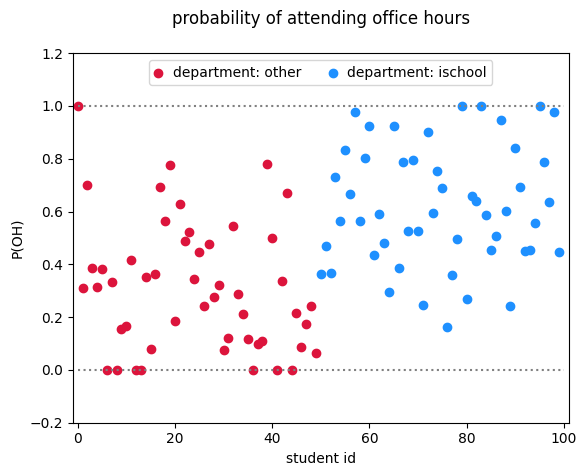

In [ ]:
# let's set up test data

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

from IPython.display import display

n_students = 100
n_features = 5

p_ischool = 0.6
p_other = 0.3

odds_ischool = p_ischool/(1 - p_ischool)
odds_other = p_other/(1 - p_other)

log_odds_ischool = np.log(odds_ischool)
log_odds_other = np.log(odds_other)


print("ischool odds (3:2):", odds_ischool, "log-odds", log_odds_ischool)
print("non-ischool odds (3:7):", odds_other, "log-odds", log_odds_other)

np.random.seed(0)
students = pd.DataFrame(np.random.normal(size = (n_students, n_features)), columns=[f"feature_{i}" for i in range(1, n_features + 1)])
students["ischool"] = (students.index > (n_students/2)).astype(int) # set the first half of the dataframe to have ischool = 0
X = students.values
y = np.random.normal(loc = p_other, scale = 0.1, size = (n_students,)) + students["ischool"] * (p_ischool - p_other) + X.sum(axis = 1)/10
y = np.clip(y, a_min = 0, a_max = 1)
students["OH"] = y

plt.scatter(list(range(n_students//2)), y[:n_students//2], color = "crimson", label = "department: other")
plt.scatter(list(range(n_students//2, n_students)), y[n_students//2:], color = "dodgerblue", label = "department: ischool")
plt.legend(handlelength = 0.5, loc="upper center", ncols = 2)
plt.title("probability of attending office hours\n")
plt.xlabel("student id")
plt.ylabel("P(OH)")
plt.hlines([0, 1], 0, 100, color="gray", linestyle="dotted")
plt.ylim(-0.2, 1.2)
plt.xlim(-1, 101)
plt.show()


## LPM

The LPM is just a linear regression of probability on the student characteristics.

$$ y = X'\beta + \varepsilon $$

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ischool   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           5.84e-42
Time:                        10:45:40   Log-Likelihood:                 94.935
No. Observations:                 100   AIC:                            -175.9
Df Residuals:                      93   BIC:                            -157.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2968      0.014     21.599      0.000       0.270       0.324
x1             0.0967      0.010      9.912      0.000       0.077       0.116
x2             0.0951      0.011      9.050      0.000       0.074       0.116
x3             0.1116      0.010     11.305      0.000       0.092       0.131
x4             0.0843      0.010      8.857      0.000       0.065       0.103
x5             0.0906      0.010      8.807      0.000       0.070       0.111
x6             0.3699      0.020     18.615      0.000       0.330       0.409
==============================================================================
Omnibus:                        3.846   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.258
Skew:                          -0.425   Prob(JB):                        0.196
Kurtosis:                       3.247   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([ 0.9729624 ,  0.3042492 ,  0.58452234,  0.39735987,  0.35153218,
        0.4019465 ,  0.05012239,  0.50316005, -0.01182006,  0.06669853,
        0.08785885,  0.2920071 , -0.02271378,  0.08274332,  0.43913794,
        0.06193897,  0.3270369 ,  0.57750263,  0.51199806,  0.61266339,
        0.18446349,  0.65835084,  0.60434703,  0.58258396,  0.3109003 ,
        0.54100511,  0.14344599,  0.32824338,  0.48238893,  0.27328202,
        0.29144904,  0.08282339,  0.43455368,  0.23982103,  0.36329604,
        0.17253533, -0.07092513,  0.12001478,  0.1416622 ,  0.74907522,
        0.47434632,  0.07040993,  0.37795111,  0.48456927,  0.02071499,
        0.27182955, -0.01811401,  0.38074526,  0.12943136,  0.16339246,
        0.34402658,  0.43228953,  0.25710771,  0.72730276,  0.63374596,
        0.67867091,  0.83132423,  0.93751013,  0.71569784,  0.85092483,
        0.68786873,  0.38895334,  0.53403669,  0.62490263,  0.37045395,
        0.89946307,  0.37152413,  0.70134772,  0.50786178,  0.70

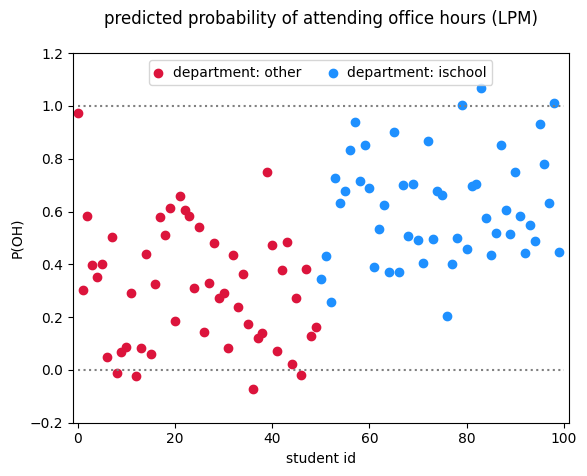

In [142]:
# let's fit the model and see how well we did
X1 = sm.add_constant(X)
lpm = sm.OLS(y, X1).fit()
display(lpm.summary())

# now let's predict 
y_hat_lpm = lpm.predict(X1)

# zoinks
display(y_hat_lpm)
plt.scatter(list(range(n_students//2)), y_hat_lpm[:n_students//2], color = "crimson", label = "department: other")
plt.scatter(list(range(n_students//2, n_students)), y_hat_lpm[n_students//2:], color = "dodgerblue", label = "department: ischool")
plt.legend(handlelength = 0.5, loc="upper center", ncols = 2)
plt.title("predicted probability of attending office hours (LPM)\n")
plt.xlabel("student id")
plt.ylabel("P(OH)")
plt.hlines([0, 1], 0, 100, color="gray", linestyle="dotted")
plt.ylim(-0.2, 1.2)
plt.xlim(-1, 101)
plt.show()

## Take 2: Logistic Regression

In the LPM, there was nothing constraining predicted probabilities from staying in the valid range $[0, 1]$. To ensure predictions output valid probabilities, we can use a function that maps from the reals to the range $[0, 1]$, like the logistic.

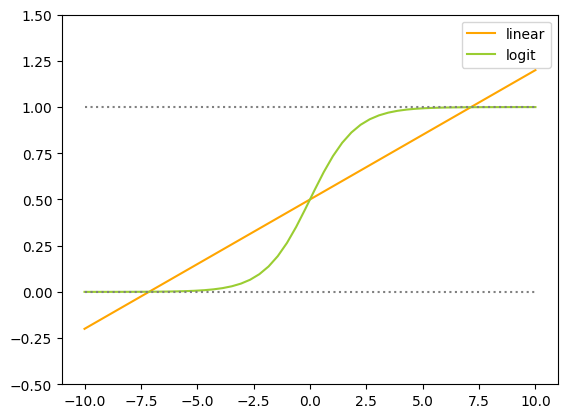

In [143]:
X_ = np.linspace(-10, 10)
m = 0.07
b = 0.5
Y = m*X_ + b

L = 1/(1 + np.exp(-X_))

plt.plot(X_, Y, color = "orange", label = "linear")
plt.plot(X_, L, color = "yellowgreen", label = "logit")
plt.legend()
plt.ylim(-0.5, 1.5)
plt.hlines([0, 1], X_[0], X_[-1], color="gray", linestyle="dotted")
plt.show()

### logistic regression transforms the data to constrain outputs to valid values:

$$ \log\left(\frac{y}{1-y}\right) \sim  X'\beta + \varepsilon $$

Optimization terminated successfully.
         Current function value: 0.456018
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ischool   No. Observations:                  100
Model:                          Logit   Df Residuals:                       93
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.3348
Time:                        10:45:41   Log-Likelihood:                -45.602
converged:                       True   LL-Null:                       -68.550
Covariance Type:            nonrobust   LLR p-value:                 3.104e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0897      0.366     -2.975      0.003      -1.808      -0.372
x1             0.5292      0.244      2.170      0.030       0.051       1.007
x2             0.5255      0.265      1.983      0.047       0.006       1.045
x3             0.6180      0.251      2.466      0.014       0.127       1.109
x4             0.4844      0.251      1.928      0.054      -0.008       0.977
x5             0.4815      0.256      1.881      0.060      -0.020       0.983
x6             1.9854      0.544      3.652      0.000       0.920       3.051
==============================================================================
"""

[0.93362326 0.2585646  0.62097554 0.37417024 0.30370776 0.37732053
 0.07693942 0.5123507  0.06033938 0.08443554 0.09436955 0.24544467
 0.05275949 0.09217177 0.41668607 0.08384373 0.27432884 0.60128448
 0.52815357 0.65666026 0.15687234 0.71177024 0.65447036 0.61737926
 0.27374185 0.56640293 0.12772762 0.29071706 0.47754776 0.22462558
 0.24351667 0.09255497 0.42550661 0.19862068 0.32767724 0.14313131
 0.04018396 0.10901308 0.12220666 0.80619465 0.47362613 0.08900282
 0.34613783 0.49821185 0.0709323  0.22541631 0.05769841 0.34574589
 0.11806317 0.14136874 0.29933256 0.39037178 0.2098229  0.77238582
 0.67559268 0.70822894 0.86149147 0.9151444  0.76049782 0.86916809
 0.72986063 0.3492823  0.53882779 0.66030882 0.32487178 0.89613686
 0.32968488 0.73890458 0.49935277 0.75047898 0.48276833 0.35948415
 0.88083104 0.49096756 0.72018519 0.70014939 0.15841611 0.37029639
 0.48423195 0.94101507 0.44705606 0.74454522 0.74666189 0.95709334
 0.59781728 0.40180005 0.52690079 0.87244931 0.6318239  0.5116

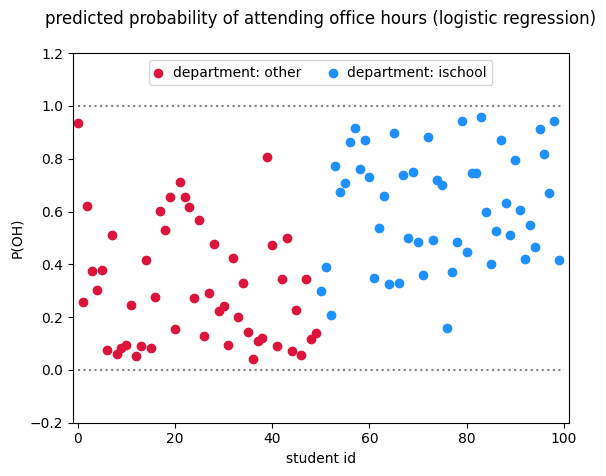

0.5291899723326269

In [144]:
# let's fit the model and see how well we did
X1 = sm.add_constant(X)
logreg = sm.Logit(y, X1).fit()
display(logreg.summary())

# now let's predict 
y_hat_logreg = logreg.predict(X1)

print(y_hat_logreg)
plt.scatter(list(range(n_students//2)), y_hat_logreg[:n_students//2], color = "crimson", label = "department: other")
plt.scatter(list(range(n_students//2, n_students)), y_hat_logreg[n_students//2:], color = "dodgerblue", label = "department: ischool")
plt.legend(handlelength = 0.5, loc="upper center", ncols = 2)
plt.title("predicted probability of attending office hours (logistic regression)\n")
plt.xlabel("student id")
plt.ylabel("P(OH)")
plt.hlines([0, 1], 0, 100, color="gray", linestyle="dotted")
plt.ylim(-0.2, 1.2)
plt.xlim(-1, 101)
plt.show()


logreg.params["x1"]

### Intepreting the logistic regression coefficients:

- start with the logistic function:
$$ \log\left(\frac{y}{1-y}\right) = X'\beta $$

- exponentiate:
$$ \frac{y}{1-y} = \exp\left(X'\beta\right) $$

- multiply by $(1-y)$
$$ y = (1- y)\exp\left(X'\beta\right) $$

- distribute 
$$ y = \exp\left(X'\beta\right) - y \exp\left(X'\beta\right) $$

- collect move terms with $y$ to the left
$$ y + y \exp\left(X'\beta\right) = \exp\left(X'\beta\right) $$

- factor out
$$ y(1 + \exp\left(X'\beta\right)) = \exp\left(X'\beta\right) $$

- divide
$$ y = \frac{\exp\left(X'\beta\right)}{1 + \exp\left(X'\beta\right)} $$

### just regress on ischool affiliation to work through calculation

In [145]:
logreg_binary = sm.Logit(y, sm.add_constant(students["ischool"])).fit()

display(logreg_binary.summary())


a = logreg_binary.params["const"]
b = logreg_binary.params["ischool"]

def logistic(z):
    return np.exp(z)/(1 + np.exp(z))


# calculate log odds
print("estimated log odds for non-ischool", a, f"(actual: {log_odds_other})")

print("estimated log odds for ischool", a+b, f"(actual: {log_odds_ischool})")

# convert to probabilities
# non-ischool probability
z0 = a + b*0
p0 = logistic(z0)
print("logreg estimate of p(OH) (non-ischool): ", round(p0, 3), f"(actual: {p_other})")

# ischool probability 
z1 = a + b*1
p1 = logistic(z1)
print("logreg estimate of p(OH) (ischool): ", round(p1, 3), f"(actual: {p_ischool})") 



Optimization terminated successfully.
         Current function value: 0.605077
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ischool   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Feb 2025   Pseudo R-squ.:                  0.1173
Time:                        10:45:41   Log-Likelihood:                -60.508
converged:                       True   LL-Null:                       -68.550
Covariance Type:            nonrobust   LLR p-value:                 6.056e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7897      0.302     -2.614      0.009      -1.382      -0.197
ischool        1.2985      0.422      3.075      0.002       0.471       2.126
==============================================================================
"""

estimated log odds for non-ischool -0.7897329916299421 (actual: -0.8472978603872036)
estimated log odds for ischool 0.508735909779419 (actual: 0.4054651081081642)
logreg estimate of p(OH) (non-ischool):  0.312 (actual: 0.3)
logreg estimate of p(OH) (ischool):  0.625 (actual: 0.6)


## things to remember:

1. LPMs can predict negative probability

2. Squashing your data through a function like the logistic function helps constrain your model output to valid values

3. Many functions map from $(-\infty, \infty) \mapsto [0, 1]$. We like the logistic because:
    
    a) the odds-ratio is somewhat interpretable
    
    b) the derivative is easy to calculate (we'll see this again in deep learning!)

4. Logistic regression coefficients interpreted as changes in log-odds (cf. [this guide to interpretation](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/))